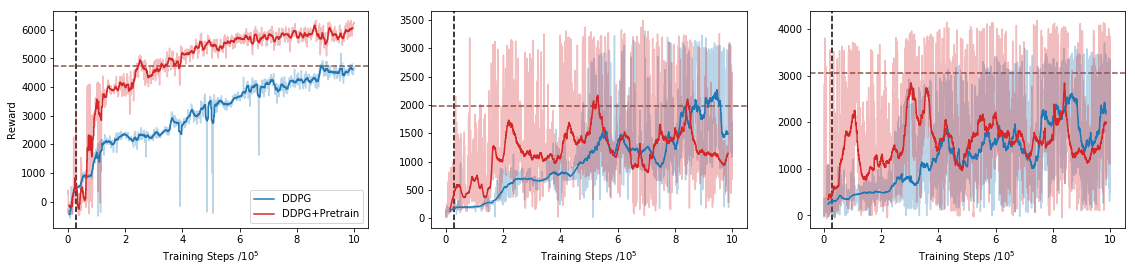

In [11]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = ['HalfCheetah-v1', 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
ave_rewards = [4721.3959546, 1982.82768185, 3062.83132533]

expertfiles = [os.path.join('./logs', var, 'expert/gym_eval.monitor.csv') for var in env_ids]
baselinefiles = [os.path.join('./logs', var, 'baseline/gym_eval.monitor.csv') for var in env_ids]

expertdata = [pandas.read_csv(file, index_col=None, comment='#') for file in expertfiles]
baselinedata = [pandas.read_csv(file, index_col=None, comment='#') for file in baselinefiles]

x_expert = [np.cumsum(var['l'].values) for var in expertdata]
x_baseline = [np.cumsum(var['l'].values) for var in baselinedata]

r_expert = [var['r'] for var in expertdata]
r_baseline = [var['r'] for var in baselinedata]


r_baseline_smooth = [var['r'] for var in baselinedata]
'''
for i in range(len(x_expert)):
    if i==0:
        sm_n = 10000
    else:
        sm_n = 30000
    r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[i], r_expert[i])
    r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[i], r_baseline[i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x_baseline[i]/1e5*2, r_baseline[i], 'C0', alpha=0.3, label='')
    ax.plot(x_expert[i]/1e5*2, r_expert[i], 'C3', alpha=0.3, label='')
    ax.plot(x_baseline_smooth/1e5*2, r_baseline_smooth, 'C0', label='DDPG')
    ax.plot(x_expert_smooth/1e5*2, r_expert_smooth, 'C3', label='DDPG+Pretrain')
    ax.vlines(0.6, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
    ax.hlines(ave_rewards[i], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
    plt.xlabel('Simulation Steps /$10^5$')
    plt.ylabel('Reward')
    
    #plt.xticks([30000],['End of Pretrain'])
    
    plt.legend()
    plt.show()
'''
pdf = PdfPages('./DDPG_results.pdf')
fig = plt.figure(figsize=(6.4*3,4.0))

sm_n = 10000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[0], r_expert[0])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[0], r_baseline[0])
ax = fig.add_subplot(131)
ax.plot(x_baseline[0]/1e5, r_baseline[0], 'C0', alpha=0.3, label='')
ax.plot(x_expert[0]/1e5, r_expert[0], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
ax.hlines(ave_rewards[0], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^5$')
plt.ylabel('Reward')
plt.legend()

##################################################
sm_n = 30000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[1], r_expert[1])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[1], r_baseline[1])
ax = fig.add_subplot(132)
ax.plot(x_baseline[1]/1e5, r_baseline[1], 'C0', alpha=0.3, label='')
ax.plot(x_expert[1]/1e5, r_expert[1], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='End of Pretrain')
ax.hlines(ave_rewards[1], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='Average Reward of ED')
plt.xlabel('Training Steps /$10^5$')

#####################################################
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[2], r_expert[2])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[2], r_baseline[2])
ax = fig.add_subplot(133)
ax.plot(x_baseline[2]/1e5, r_baseline[2], 'C0', alpha=0.3, label='')
ax.plot(x_expert[2]/1e5, r_expert[2], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='End of Pretrain')
ax.hlines(ave_rewards[2], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='Average Reward of ED')


plt.xlabel('Training Steps /$10^5$')


#plt.xticks([30000],['End of Pretrain'])

plt.show()
pdf.savefig(fig)
plt.close()
pdf.close()

In [31]:
import os
import numpy as np
import pandas
def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 5000)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x

sm_n = 800
env_ids = ['Humanoid-v2','Hopper-v2','Walker2d-v2']

dir_names = {env_ids[0]:['ppoexpert_1_25pre_4_long_1m',
                         'ppoexpert_sup_1_25pre_4_long_1m',
                         #'ppoexpert_pofd_1_25pre_4_long_high',
                         #'ppoexpert_gail_1_25pre_4_long_high',
                          'baseline_4_long_'],
             env_ids[1]:['ppoexpert_1_25pre_4_long_low',
                         'ppoexpert_sup_1_25pre_4_long_low',
                         'ppoexpert_pofd_1_25pre_4_long_low',
                         'ppoexpert_gail_1_25pre_4_long_low',
                         'baseline_4_long_'],
             env_ids[2]:['ppoexpert_1_25pre_4_long_low',
                         'ppoexpert_sup_1_25pre_4_long_low',
                         'ppoexpert_pofd_1_25pre_4_long_low',
                         'ppoexpert_gail_1_25pre_4_long_low',
                         'baseline_4_long_']}

new_names = {env_ids[0]:['ours.csv',
                         'BC.csv',
                         #'POFD.csv',
                         #'GAIL.csv',
                         'Baseline.csv'],
             env_ids[1]:['ours.csv',
                         'BC.csv',
                         'POFD.csv',
                         'GAIL.csv',
                         'Baseline.csv'],
             env_ids[2]:['ours.csv',
                         'BC.csv',
                         'POFD.csv',
                         'GAIL.csv',
                         'Baseline.csv']}

for env_id in env_ids:
    j=0
    for dir_name in dir_names[env_id]:
        xs = []
        rs = []
        for _ in range(16):
            name = dir_name + "%03d" % (j+1)
            file_path = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_id, name, 'gym_eval.monitor.csv')
            data = pandas.read_csv(file_path, index_col=None, comment='#')
            x = np.cumsum(data['l'].values)/2.; r = data['r']
            xs.append(x); rs.append(r)
            
        x_concat = np.concatenate(xs); r_concat = np.concatenate(rs)
        x_sm, r_sm = smooth(sm_n, x_concat, r_concat)
        new_path = os.path.join('~/Projects/conda/baselines/data/smooth_logs', env_id, new_names[env_id][j])
        data = {'x':x_sm, 'r':r_sm}
        data = pandas.DataFrame(data)
        data.to_csv(new_path)
        j=j+1

~/Projects/conda/baselines/data/smooth_logs/Humanoid-v2/ours.csv
~/Projects/conda/baselines/data/smooth_logs/Humanoid-v2/BC.csv
~/Projects/conda/baselines/data/smooth_logs/Humanoid-v2/Baseline.csv
~/Projects/conda/baselines/data/smooth_logs/Hopper-v2/ours.csv
~/Projects/conda/baselines/data/smooth_logs/Hopper-v2/BC.csv
~/Projects/conda/baselines/data/smooth_logs/Hopper-v2/POFD.csv
~/Projects/conda/baselines/data/smooth_logs/Hopper-v2/GAIL.csv
~/Projects/conda/baselines/data/smooth_logs/Hopper-v2/Baseline.csv
~/Projects/conda/baselines/data/smooth_logs/Walker2d-v2/ours.csv
~/Projects/conda/baselines/data/smooth_logs/Walker2d-v2/BC.csv
~/Projects/conda/baselines/data/smooth_logs/Walker2d-v2/POFD.csv
~/Projects/conda/baselines/data/smooth_logs/Walker2d-v2/GAIL.csv
~/Projects/conda/baselines/data/smooth_logs/Walker2d-v2/Baseline.csv


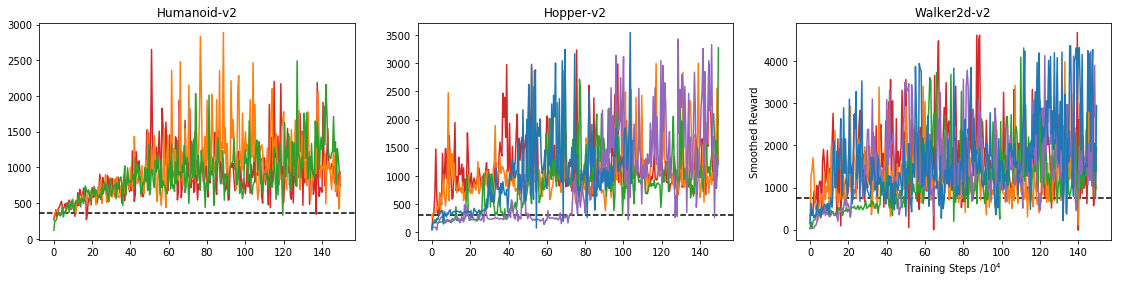

"\ndisplay.clear_output(wait=True)\npdf = PdfPages('./pretrainwalker2d.pdf')\npdf.savefig(fig)\nplt.close()\npdf.close()\n"

In [32]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from IPython import display
import time

env_ids = ['Humanoid-v2','Hopper-v2','Walker2d-v2']
# ave_rew = 747.5343 #walker2d low average reward
# ave_rew = 314.4180 #hopper low average reward
# ave_rew = 366.7058 #Humanoid 1m average reward
ave_rews = [366.7058, 314.4180, 747.5343]

new_names = {env_ids[0]:['ours.csv',
                         'BC.csv',
                         #'POFD.csv',
                         #'GAIL.csv',
                         'Baseline.csv'],
             env_ids[1]:['ours.csv',
                         'BC.csv',
                         'POFD.csv',
                         'GAIL.csv',
                         'Baseline.csv'],
             env_ids[2]:['ours.csv',
                         'BC.csv',
                         'POFD.csv',
                         'GAIL.csv',
                         'Baseline.csv']}

labels = ['Ours',
          'BC',
          #'POFD$^*$',
          #'GAIL$^*$',
          'Baseline']

colors = ['C3',
          'C1',
          'C2',
          'C4',
          'C0']


fig, axs = plt.subplots(1,3, figsize=(6.4*3,4.0), facecolor='w', edgecolor='k')
axs = axs.ravel()
i=0
for env_id in env_ids:
    j = 0
    for name in new_names[env_id]:
        new_path = os.path.join('~/Projects/conda/baselines/data/smooth_logs', env_id, new_names[env_id][j])
        print(new_path)
        data = pandas.read_csv(new_path)
        r_sm = data['r']; x_sm = data['x']
        axs[i].plot(r_sm/1e4, x_sm, colors[j], label='')
        j = j+1

    #ax.vlines(5, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
    axs[i].hlines(ave_rews[i], 0, 1, transform=axs[i].get_yaxis_transform(), colors='k', linestyles = "dashed", label='Demo')
    axs[i].set_title(env_id)
    plt.xlabel('Training Steps /$10^4$')
    plt.ylabel('Smoothed Reward')
    #plt.legend()
    
    i=i+1

plt.show()
'''
display.clear_output(wait=True)
pdf = PdfPages('./pretrainwalker2d.pdf')
pdf.savefig(fig)
plt.close()
pdf.close()
'''

In [4]:
seeds = [234,4563,8274,9981,19982,
         77819,99818,88982,99991,199918,
         222918,381771,200928,999182,827466,
         881773]

baseline = 0
ous = 0
sup = 0
gail = 0
pofd = 0

env_id = 'Hopper-v2'
nb_epochs = '1500'
expert_dir = 'Hopper_ppo2_low'
pre_epoch = '25'
log_dir = '25pre_4_long_low'

class myprint:
    def __init__(self):
        self.n_print = 0
        self.N = 4
    def p(self,x):
        if self.n_print % self.N is not self.N-1:
            x = 'nohup ' + x + ' &'
        print(x)
        self.n_print += 1
        if self.n_print % self.N is 0 and self.N is not 1:
            print(' ')
            print('wait')
            print(' ')

p = myprint()

for i in range(16):
    stri = "%03d" % (i+1)
    if baseline:
        code = 'python main.py --evaluation --env-id '+ env_id + ' --nb-epochs ' + nb_epochs + ' --log-dir baseline_4_long_' + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001'
        p.p(code)
        
for i in range(16):
    stri = "%03d" % (i+1)
    if ous:
        code = 'python main.py --use-expert --evaluation --env-id '+ env_id +' --nb-epochs ' + nb_epochs + ' --expert-dir ~/Projects/conda/demonstrations/' + expert_dir + '/expert.pkl --pre-epoch ' + pre_epoch + ' --log-dir ppoexpert_1_' + log_dir + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001'
        p.p(code)
for i in range(16):
    stri = "%03d" % (i+1)
    if sup:
        code = 'python main.py --use-expert --evaluation --env-id ' + env_id + ' --nb-epochs ' + nb_epochs + ' --expert-dir ~/Projects/conda/demonstrations/' + expert_dir + '/expert.pkl --pre-epoch ' + pre_epoch + ' --supervise --log-dir ppoexpert_sup_1_' + log_dir + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001'
        p.p(code)
        
for i in range(16):
    stri = "%03d" % (i+1)
    if gail:
        code = 'python main.py --use-expert --evaluation --env-id ' + env_id + ' --nb-epochs ' + nb_epochs + ' --expert-dir ~/Projects/conda/demonstrations/' + expert_dir + '/expert.pkl --pre-epoch ' + pre_epoch + ' --gail --log-dir ppoexpert_gail_1_' + log_dir + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001'
        p.p(code)
        
        
for i in range(16):
    stri = "%03d" % (i+1)
    if pofd:
        code = 'python main.py --use-expert --evaluation --env-id ' + env_id + ' --nb-epochs ' + nb_epochs + ' --expert-dir ~/Projects/conda/demonstrations/' + expert_dir + '/expert.pkl --pre-epoch ' + pre_epoch + ' --pofd --log-dir ppoexpert_pofd_1_' + log_dir + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001'
        p.p(code)
        
for i in range(16):
    stri = "%03d" % (i+1)
    if actor_only:
        code = 'python main.py --use-expert --evaluation --env-id ' + env_id + ' --nb-epochs ' + nb_epochs + ' --expert-dir ~/Projects/conda/demonstrations/' + expert_dir + '/expert.pkl --pre-epoch ' + pre_epoch + ' --actor-only --log-dir ppoexpert_actor_1_' + log_dir + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001'
        p.p(code)
        
for i in range(16):
    stri = "%03d" % (i+1)
    if critic_only:
        code = 'python main.py --use-expert --evaluation --env-id ' + env_id + ' --nb-epochs ' + nb_epochs + ' --expert-dir ~/Projects/conda/demonstrations/' + expert_dir + '/expert.pkl --pre-epoch ' + pre_epoch + ' --critic-only --log-dir ppoexpert_critic_1_' + log_dir + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001'
        p.p(code)

nohup python main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --log-dir ppoexpert_1_25pre_4_long_low001 --seed 234 --actor-lr 0.0001 --critic-lr 0.001 &
nohup python main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --log-dir ppoexpert_1_25pre_4_long_low002 --seed 4563 --actor-lr 0.0001 --critic-lr 0.001 &
nohup python main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --log-dir ppoexpert_1_25pre_4_long_low003 --seed 8274 --actor-lr 0.0001 --critic-lr 0.001 &
python main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --log-dir ppoexpert_1_25pre_4_long_low004 --seed 99


KeyboardInterrupt



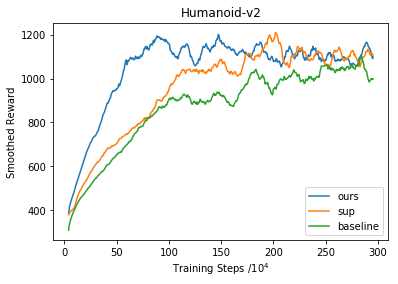

In [3]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from IPython import display
import time

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 5000)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x

env_ids = 'Humanoid-v2'

dir_names = ['ppoexpert_1_25pre_4_long_1m',
             'ppoexpert_sup_1_25pre_4_long_1m',
             #'ppoexpert_both_1_25pre_4_low_',
             #'ppoexpert_pofd_1_25pre_4_long_low',
             #'ppoexpert_gail_1_25pre_4_long_low',
             'baseline_4_long_']

labels = ['ours',
          'sup',
          #'both',
          #'pofd',
          #'gail',
          'baseline']

colors = ['C0',
          'C1',
          'C2',
          'C3',
          'C4']

sm_n = 80000
if True:
    i=0

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for dir_name in dir_names:
        xs = []
        rs = []
        for j in range(16):
            name = dir_name + "%03d" % (j+1)
            file_path = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, name, 'gym_eval.monitor.csv')
            data = pandas.read_csv(file_path, index_col=None, comment='#')
            x = np.cumsum(data['l'].values); r = data['r']
            xs.append(x); rs.append(r)
        x_concat = np.concatenate(xs); r_concat = np.concatenate(rs)
        x_sm, r_sm = smooth(sm_n, x_concat, r_concat)
        ax.plot(r_sm/1e4, x_sm, colors[i], alpha=1, label=labels[i])
        i=i+1

    #ax.vlines(5, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
    ax.set_title(env_ids)
    plt.xlabel('Training Steps /$10^4$')
    plt.ylabel('Smoothed Reward')
    plt.legend()

    plt.show()
    '''
    time.sleep(100)
    display.clear_output(wait=True)
    pdf = PdfPages('./pretrainhopper.pdf')
    pdf.savefig(fig)
    plt.close()
    pdf.close()'''